In [96]:
import pandas as pd
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [97]:
driver = pd.read_csv("driver_ids.csv")
rider = pd.read_csv("ride_ids.csv")
timestamps = pd.read_csv("ride_timestamps.csv")

In [98]:
pivot_timestamps = timestamps.pivot(index='ride_id', columns='event', values='timestamp')
pivot_timestamps.reset_index(level=0, inplace=True)
pivot_timestamps

event,ride_id,accepted_at,arrived_at,dropped_off_at,picked_up_at,requested_at
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:39:51,2016-06-13 09:44:31,2016-06-13 10:03:05,2016-06-13 09:44:33,2016-06-13 09:39:19
1,00005eae40882760d675da5effb89ae3,2016-05-14 05:23:25,2016-05-14 05:26:17,2016-05-14 05:34:17,2016-05-14 05:26:18,2016-05-14 05:23:21
2,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:43:14,2016-05-16 15:47:29,2016-05-16 15:54:18,2016-05-16 15:47:32,2016-05-16 15:43:09
3,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:29:43,2016-05-11 19:35:11,2016-05-11 19:40:47,2016-05-11 19:35:15,2016-05-11 19:29:36
4,0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:12:15,2016-04-26 18:16:52,2016-04-26 18:24:14,2016-04-26 18:16:55,2016-04-26 18:11:38
...,...,...,...,...,...,...
194076,fffebb46effb90ce758fdff68b569355,2016-06-16 09:57:12,2016-06-16 09:58:54,2016-06-16 10:15:08,2016-06-16 09:58:57,2016-06-16 09:57:07
194077,ffff9c38173ddfa17bdd115c463e329f,2016-06-03 18:34:07,2016-06-03 18:35:20,2016-06-03 18:50:08,2016-06-03 18:35:22,2016-06-03 18:34:00
194078,ffff9e431f7fade54b2550ac19ab6e64,2016-06-12 04:00:10,2016-06-12 04:04:35,2016-06-12 04:15:42,2016-06-12 04:04:37,2016-06-12 04:00:10
194079,ffffa07f48f2f885f714765d794ad596,2016-04-19 01:09:12,2016-04-19 01:10:49,2016-04-19 01:30:48,2016-04-19 01:10:50,2016-04-19 01:08:57


In [99]:
rider['duration_min'] = rider['ride_duration'].apply(lambda x: x / 60)


In [100]:
rider['time_money'] = rider['duration_min'].apply(lambda x: x * 0.22)


In [101]:
rider['distance_mi'] = rider['ride_distance'].apply(lambda x: x *  0.00062137)

In [102]:
rider['dist_money'] = rider['distance_mi'].apply(lambda x: x * 1.15)

In [103]:
rider['total cost'] = ((rider['dist_money'] + rider['time_money']) * (1 + (0.01 * rider['ride_prime_time']))) + 2 + 1.75

In [104]:
rider['total cost'] = rider['total cost'].apply(lambda x: x if x <= 400 else 400)

In [105]:
rider['total cost'] = rider['total cost'].apply(lambda x: x if x >= 5 else 5)

# Timestamps + Costs

In [106]:
drive = rider.drop(['ride_id', 'ride_distance', 'ride_duration',], axis = 1)

In [107]:
combined_timestamps = pd.merge(rider,pivot_timestamps,on = 'ride_id', how = 'inner')
combined_timestamps = combined_timestamps.drop(['ride_distance','ride_duration'], axis = 1)
combined_timestamps['picked_up_at'] = pd.to_datetime(combined_timestamps['picked_up_at'].str.strip(), format='%Y-%m-%d %H:%M:%S')

In [108]:
sample1 = combined_timestamps[combined_timestamps['driver_id'] == '002be0ffdc997bd5c50703158b7c2491']
sample2 = combined_timestamps[combined_timestamps['driver_id'] == 'ffff51a71f2f185ec5e97d59dbcd7a78']

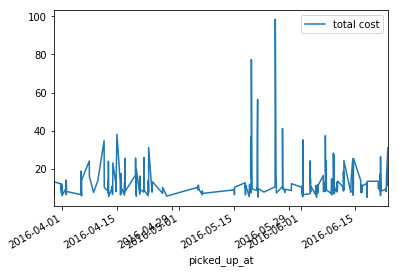

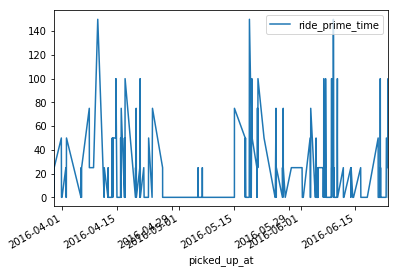

In [109]:
sample1.plot.line(x = 'picked_up_at', y = 'total cost')
sample1.plot.line(x = 'picked_up_at', y = 'ride_prime_time')

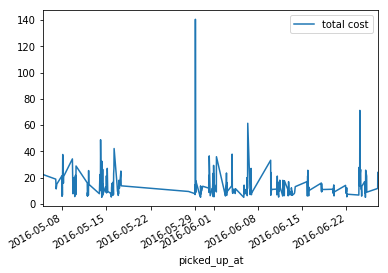

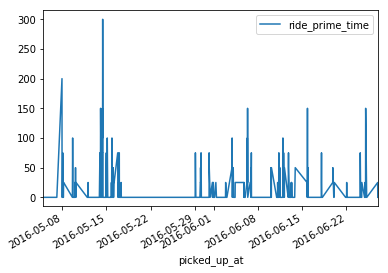

In [110]:
sample2.plot.line(x = 'picked_up_at', y = 'total cost')
sample2.plot.line(x = 'picked_up_at', y = 'ride_prime_time')

In [111]:
test = combined_timestamps
#test.set_index(['picked_up_at'],inplace=True)


In [112]:
test = test.drop(['ride_id','ride_prime_time','duration_min','time_money','distance_mi','dist_money','accepted_at','arrived_at','dropped_off_at','requested_at'], axis = 1)


In [113]:
test.rename(columns={'total cost':'total_cost'}, inplace=True)
#test['Time stamp'] = pd.to_datetime(test['picked_up_at'].str.strip(), format='%Y-%m-%d %H:%M:%S')

In [114]:
#test['just_date'] = test['Time stamp'].dt.date

In [115]:
pd.set_option('display.max_rows', 1000)
test_sample = test[:277]

In [116]:
test_sample.picked_up_at.dtype

dtype('<M8[ns]')

Text(0, 0.5, 'money')

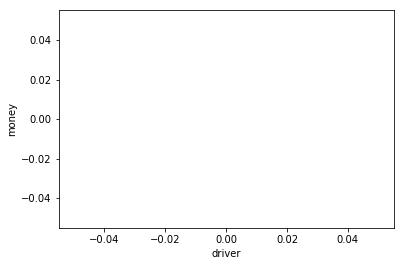

In [117]:
fig,ax = plt.subplots()
for name in test_sample['driver_id'].tolist():
    ax.plot(test_sample[test_sample.driver_id=='driver_id'].picked_up_at,test_sample[test_sample.driver_id=='driver_id'].total_cost,label=name)

ax.set_xlabel("driver")
ax.set_ylabel("money")

# Totaling everything

In [118]:
df = pd.DataFrame()

df = drive.groupby(['driver_id'], as_index=False).size()
df = df.to_frame().reset_index()
df = df.rename(columns= {0: 'rides'})
drive = drive.groupby(['driver_id'],as_index=False).sum()
combined = pd.merge(drive,df,on = 'driver_id', how = 'inner')

In [119]:
combined_date = pd.merge(combined,driver, on = 'driver_id', how = 'inner')

In [120]:
combined_date['average prime'] = combined_date['ride_prime_time'] / combined_date['rides']

In [121]:
combined_date

,driver_id,ride_prime_time,duration_min,time_money,distance_mi,dist_money,total cost,rides,driver_onboard_date,average prime
0,002be0ffdc997bd5c50703158b7c2491,5375,3687.300000,811.206000,1081.362133,1243.566453,3453.419687,277,2016-03-29 00:00:00,19.404332
1,007f0389f9c7b03ef97098422f902e62,625,341.616667,75.155667,73.030237,83.984773,308.994506,31,2016-03-29 00:00:00,20.161290
2,011e5c5dfc5c2c92501b8b24d47509bc,675,486.750000,107.085000,167.554285,192.687427,468.927442,34,2016-04-05 00:00:00,19.852941
3,0152a2f305e71d26cc964f8d4411add9,2050,2908.683333,639.910333,914.183777,1051.311344,2569.866550,191,2016-04-23 00:00:00,10.732984
4,01674381af7edd264113d4e6ed55ecda,4700,5957.383333,1310.624333,1940.938672,2232.079473,5287.086873,375,2016-04-29 00:00:00,12.533333
5,0213f8b59219e32142711992ca4ec01f,2475,2997.966667,659.552667,969.285005,1114.677756,2891.654771,240,2016-04-07 00:00:00,10.312500
6,021e5cd15ef0bb3ec20a12af99e142b3,1200,840.783333,184.972333,160.108408,184.124669,662.241103,53,2016-05-07 00:00:00,22.641509
7,0258e250ca195cc6258cbdc75aecd853,3500,4485.916667,986.901667,1531.436580,1761.152067,4210.362722,302,2016-04-26 00:00:00,11.589404
8,028b5a4dcd7f4924ebfabcf2e814c014,3975,5842.816667,1285.419667,1834.670111,2109.870627,5118.254777,363,2016-05-06 00:00:00,10.950413
9,02d6a6b8a6da15fc219a9570f7ebbe78,225,1608.116667,353.785667,994.017395,1143.120004,1561.571428,62,2016-05-03 00:00:00,3.629032


In [122]:
pred = combined_date.drop(['driver_id', 'average prime', 'driver_onboard_date', 'time_money', 'dist_money'], axis = 1)

In [123]:
pred

,ride_prime_time,duration_min,distance_mi,total cost,rides
0,5375,3687.300000,1081.362133,3453.419687,277
1,625,341.616667,73.030237,308.994506,31
2,675,486.750000,167.554285,468.927442,34
3,2050,2908.683333,914.183777,2569.866550,191
4,4700,5957.383333,1940.938672,5287.086873,375
5,2475,2997.966667,969.285005,2891.654771,240
6,1200,840.783333,160.108408,662.241103,53
7,3500,4485.916667,1531.436580,4210.362722,302
8,3975,5842.816667,1834.670111,5118.254777,363
9,225,1608.116667,994.017395,1561.571428,62


In [124]:
numerical_columns = [col for col in pred.columns if (pred[col].dtype=='int64' or pred[col].dtype=='float64') and col != 'Exited']

In [125]:
pred[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,ride_prime_time,duration_min,distance_mi,total cost,rides
min,0.000000,28.533333,6.148456,25.691293,3.00000
max,19675.000000,12996.616667,4118.565255,12017.764692,919.00000
mean,3779.976581,3118.229450,938.201341,2869.708691,217.67096
50%,3275.000000,3095.800000,877.637901,2845.032938,223.00000


Text(0, 0.5, 'Total prime time')

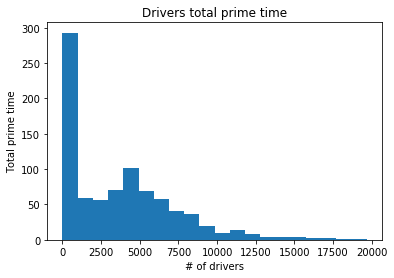

In [126]:
plt.hist(combined_date["ride_prime_time"],bins=20)
plt.title("Drivers total prime time")
plt.xlabel('# of drivers')
plt.ylabel('Total prime time')

Text(0, 0.5, 'Total driving time')

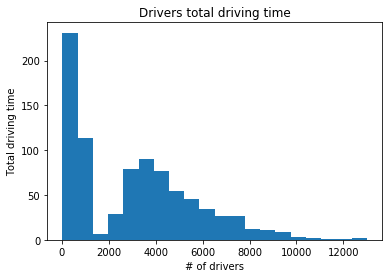

In [127]:
plt.hist(combined_date["duration_min"],bins=20)
plt.title("Drivers total driving time")
plt.xlabel('# of drivers')
plt.ylabel('Total driving time')

Text(0, 0.5, 'Total distance')

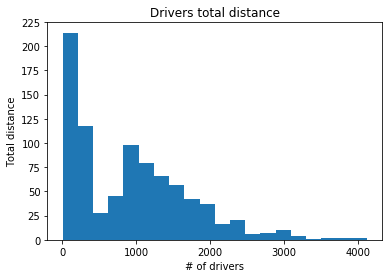

In [128]:
plt.hist(combined_date["distance_mi"],bins=20)
plt.title("Drivers total distance")
plt.xlabel('# of drivers')
plt.ylabel('Total distance')

Text(0, 0.5, 'Total revenue')

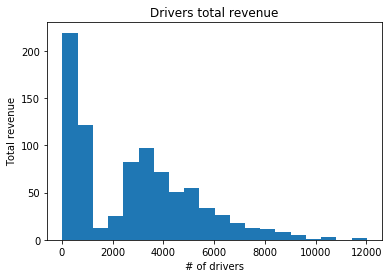

In [129]:
plt.hist(combined_date["total cost"],bins=20)
plt.title("Drivers total revenue")
plt.xlabel('# of drivers')
plt.ylabel('Total revenue')

In [130]:
feat = pred.drop(columns=['total cost'],axis=1)
label = pred["total cost"]
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

In [131]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)
lab_enc = preprocessing.LabelEncoder()


In [132]:
#training_scores_encoded = lab_enc.fit_transform(y_train)

In [133]:
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,training_scores_encoded)
y_pred_svc = support_vector_classifier.predict(X_test)

NameError: name 'training_scores_encoded' is not defined

In [ ]:
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
cm_xgb_classifier = confusion_matrix(y_test,y_pred_xgb)
print(cm_xgb_classifier,end='\n\n')